#  Beta Calculator 
## Author : Avnit Bambah
### Date : 03/12/2018
###### Learning ML with python 3 on Pluralsight.
###### Predicting stock beta 

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np 
from pandas_datareader import data
import googlefinance
import matplotlib.pyplot as plt

# do ploting inline instead of seperate windows 
%matplotlib inline

In [2]:
# add new stocks to the csv file 
df = pd.read_csv("./holdings-xlk.csv")

In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index in addition to the one in the csv file 
tickers = ['AAPL', 'MSFT', 'SPY','CME','GOOG','VVI','agg']
# get the symbols and add them to the list 
symbols = df.iloc[:,[0]]
array = symbols.values.tolist()
for i in range(1 , len(array)):
    tickers.append(str(array[i]).replace('[\'', '').replace('\']',''))


In [4]:

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2018.
start_date = '2000-01-01'
end_date = '2018-03-24'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
try:
    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
except:
    print('error in the symbol')
#del panel_data["2017-01-02"]

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Adj Close']

close.dropna(axis=0, how='any')

# Getting all weekdays between start date and end date 
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close_onedayold = close.shift(-1)
close_onedayold.head(10)

close_final = close - close_onedayold


/Users/avnitbambah/anaconda3/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'NUTR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [5]:
vr = close.corr()
vr.head(10)


,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
AAPL,1.000000,-0.669186,0.650407,0.936062,0.684971,0.915372,-0.703757,0.593848,0.956831,0.185599,...,0.443312,-0.486193,-0.519303,0.937320,0.965438,NaN,0.708511,-0.493247,NaN,0.887378
BETR,-0.669186,1.000000,-0.078369,0.308227,-0.581386,-0.588406,0.747871,-0.505143,-0.555503,-0.119124,...,-0.417232,-0.247830,0.410661,-0.637428,-0.556837,NaN,-0.664139,NaN,NaN,-0.140608
BUFF,0.650407,-0.078369,1.000000,-0.248258,0.635458,0.797233,-0.531502,0.716681,0.698244,0.069239,...,0.598517,-0.015995,-0.159265,0.587096,0.758926,NaN,0.631657,-0.939039,NaN,0.502931
CALM,0.936062,0.308227,-0.248258,1.000000,0.544791,0.832050,0.289356,-0.265112,0.887796,-0.731628,...,0.407775,-0.467830,-0.547360,0.878630,0.906301,NaN,0.548055,-0.270749,NaN,0.878670
CENT,0.684971,-0.581386,0.635458,0.544791,1.000000,0.736442,-0.835450,0.045755,0.690549,0.527623,...,0.604939,0.022598,-0.084792,0.753446,0.703491,NaN,0.865030,-0.485567,NaN,0.348493
CME,0.915372,-0.588406,0.797233,0.832050,0.736442,1.000000,-0.813358,0.301428,0.958832,0.221677,...,0.515731,-0.451223,-0.287172,0.900730,0.957320,NaN,0.886091,-0.413933,NaN,0.748169
DTEA,-0.703757,0.747871,-0.531502,0.289356,-0.835450,-0.813358,1.000000,-0.057489,-0.858145,-0.300839,...,-0.474996,0.288723,0.624573,-0.798169,-0.806289,NaN,-0.846973,0.249263,NaN,-0.655630
FRPT,0.593848,-0.505143,0.716681,-0.265112,0.045755,0.301428,-0.057489,1.000000,0.061231,0.072662,...,0.473951,0.602256,0.470791,0.345904,0.393145,NaN,0.221741,-0.376312,NaN,-0.035979
GOOG,0.956831,-0.555503,0.698244,0.887796,0.690549,0.958832,-0.858145,0.061231,1.000000,0.244621,...,0.400323,-0.627298,-0.405371,0.940656,0.971929,NaN,0.790159,-0.402471,NaN,0.836116
KHC,0.185599,-0.119124,0.069239,-0.731628,0.527623,0.221677,-0.300839,0.072662,0.244621,1.000000,...,0.200496,0.084573,-0.690083,0.298551,0.312467,NaN,0.360078,-0.385210,NaN,0.605116


In [6]:
covar = close_final.cov()
covar.head(10)


,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
AAPL,0.790129,0.082299,0.149833,0.063228,0.037944,0.240610,0.025684,0.134653,3.181668,0.583230,...,0.035921,0.018094,0.093943,0.120666,0.531436,NaN,0.090070,-0.475934,NaN,-0.019480
BETR,0.082299,0.151804,0.042721,0.038721,0.021515,0.041686,0.008618,0.017510,0.433829,0.038860,...,0.024728,0.009556,-0.000227,0.074199,0.162904,NaN,0.018389,NaN,NaN,0.000018
BUFF,0.149833,0.042721,0.296293,0.078403,0.050069,0.136931,0.019553,0.044157,0.999974,0.107708,...,0.038858,-0.005401,-0.000076,0.157119,0.300523,NaN,0.043564,-0.028433,NaN,-0.001000
CALM,0.063228,0.038721,0.078403,0.245597,0.023966,0.106906,0.043064,0.034162,0.572838,0.197657,...,0.037489,0.009377,0.130481,0.127632,0.176874,NaN,0.056064,0.001833,NaN,-0.007287
CENT,0.037944,0.021515,0.050069,0.023966,0.109393,0.059475,0.009189,0.021278,0.430200,0.130463,...,0.017991,0.014651,0.088006,0.050558,0.122808,NaN,0.046862,-0.043566,NaN,-0.004589
CME,0.240610,0.041686,0.136931,0.106906,0.059475,0.903754,0.039096,0.052095,2.452420,0.303425,...,0.064926,0.071860,0.500329,0.258598,0.718576,NaN,0.156010,-0.074899,NaN,-0.050366
DTEA,0.025684,0.008618,0.019553,0.043064,0.009189,0.039096,0.516684,0.015549,0.130587,0.040208,...,0.030699,0.005369,-0.000660,0.055836,0.081862,NaN,0.015638,0.006917,NaN,-0.002265
FRPT,0.134653,0.017510,0.044157,0.034162,0.021278,0.052095,0.015549,0.181723,0.525317,0.079710,...,0.021344,-0.000301,0.000956,0.061030,0.161315,NaN,0.026143,-0.031250,NaN,-0.006066
GOOG,3.181668,0.433829,0.999974,0.572838,0.430200,2.452420,0.130587,0.525317,49.505934,4.192031,...,0.358821,0.200331,0.763855,1.206816,5.706095,NaN,0.896629,-0.846947,NaN,-0.088129
KHC,0.583230,0.038860,0.107708,0.197657,0.130463,0.303425,0.040208,0.079710,4.192031,0.968436,...,0.132981,0.004113,-0.003645,0.443165,0.884554,NaN,0.111313,-0.055900,NaN,0.009923


In [7]:
market_temp = close_final.iloc[:,[20]]
market = market_temp.dropna()


In [8]:
#total = sum(market)
mean_value = pd.DataFrame.mean(market)
print(mean_value)
variance = pd.DataFrame.var(market)
print(variance)
market.head(10)

SPY   -0.031624
dtype: float64
SPY    1.696072
dtype: float64


,SPY
2000-01-03,4.043312
2000-01-04,-0.177711
2000-01-05,1.599548
2000-01-06,-5.687286
2000-01-07,-0.355492
2000-01-10,1.244125
2000-01-11,1.021920
2000-01-12,-1.377381
2000-01-13,-1.399566
2000-01-18,-0.844230


In [9]:
covartotal = pd.DataFrame.sum(covar)
print(covartotal)
print(variance[[0][0]])


AAPL      6.608920
BETR      1.396304
BUFF      2.885049
CALM      2.303075
CENT      1.431950
CME       6.751351
DTEA      1.151857
FRPT      1.606855
GOOG     78.410438
KHC       9.805761
LANC      5.773939
LWAY      1.027115
MSFT      4.401080
NUTR      0.000000
PF        3.541414
POST      6.455729
PPC       1.682447
RELV      2.842821
RIBT    113.662828
SAFM      6.067782
SPY      14.028377
TOF       0.000000
VVI       3.045391
WILC     -1.852250
WWAV      0.000000
agg      -0.205133
dtype: float64
1.69607197374


In [10]:
beta_appl = (covartotal/(variance[[0][0]] ** 2 ))


In [11]:
beta_appl.head(100)

AAPL     2.297428
BETR     0.485391
BUFF     1.002916
CALM     0.800607
CENT     0.497782
CME      2.346941
DTEA     0.400415
FRPT     0.558584
GOOG    27.257456
KHC      3.408731
LANC     2.007168
LWAY     0.357051
MSFT     1.529927
NUTR     0.000000
PF       1.231085
POST     2.244175
PPC      0.584861
RELV     0.988237
RIBT    39.512081
SAFM     2.109315
SPY      4.876620
TOF      0.000000
VVI      1.058655
WILC    -0.643889
WWAV     0.000000
agg     -0.071310
dtype: float64

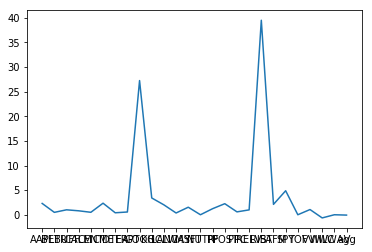

In [12]:
plt.plot(beta_appl)